# Image processing Task

## Task 1 - NumPy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
plt.rcParams['figure.figsize'] = [10, 3]

In [5]:
img = np.zeros((300,300), dtype=np.uint8)
print(img)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


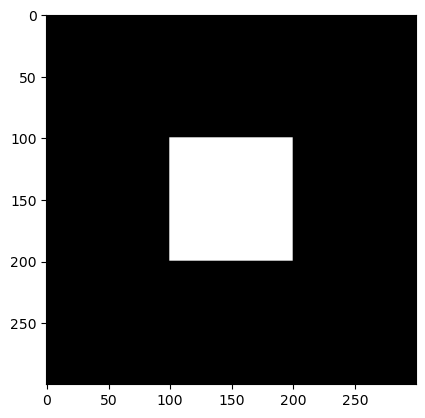

In [6]:
img[100:200, 100:200] = 255
plt.imshow(img, cmap='gray')
plt.show()

## Task 2 - Image concatenation

In [2]:
image1 = cv2.imread('./task-assets/concat1.jpg',0)
image2 = cv2.imread('./task-assets/concat2.jpg',0)
image3 = cv2.imread('./task-assets/concat3.jpg',0)


[[189 189 189 ... 195 195 195]
 [189 189 189 ... 195 195 195]
 [189 189 189 ... 195 195 195]
 ...
 [115 115 115 ... 121 121 121]
 [114 114 114 ... 120 120 120]
 [114 114 114 ... 119 119 119]]


In [3]:
cv2.imshow('image1', image1)
cv2.imshow('image2', image2)
cv2.imshow('image3', image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Task 3 - Thresholding

In [11]:
img1 = cv2.imread('./task-assets/threshold.jpg',0)
thresh = np.copy(img1)

In [7]:
def displayImage(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()    

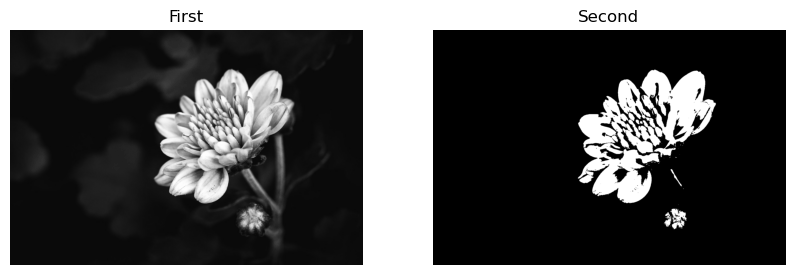

In [14]:
thresh[thresh>180] = 255
thresh[thresh<180] = 0
displayImages(img1, thresh)

## Task 4 - Feature Matching

In [15]:
imgf1 = cv2.imread('./task-assets/feature1.jpeg', 0)
imgf2 = cv2.imread('./task-assets/feature2.jpeg', 0)


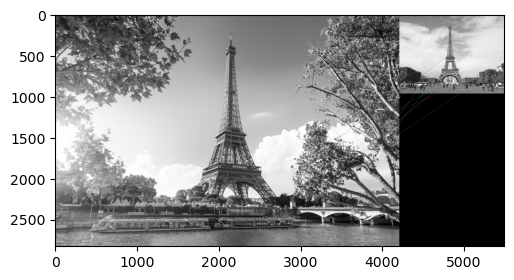

(<matplotlib.image.AxesImage at 0x14a98803690>, None)

In [16]:
img1 = cv2.imread('./task-assets/feature1.jpeg',cv2.IMREAD_GRAYSCALE) # queryImage
img2 = cv2.imread('./task-assets/feature2.jpeg',cv2.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

## 